<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-4--job-resume-improvement/03_large_text_analysis_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Large text analysis using Clustering

In this notebook, we execute NLP on large collections
of real-world texts. This type of analysis is seemingly straightforward, given the
techniques presented thus far. For example, suppose we’re doing market research
across multiple online discussion forums. Each forum is composed of hundreds of
users who discuss a specific topic, such as politics, fashion, technology, or cars. We
want to automatically extract all the discussion topics based on the contents of the
user conversations. These extracted topics will be used to plan a marketing campaign,
which will target users based on their online interests.

How do we cluster user discussions into topics? 

One approach would be to do the following:
1. Convert all discussion texts into a matrix of word counts
2. Dimensionally reduce the word count matrix using singular value decomposition (SVD). This will allow us to efficiently complete all pairs of text similarities with matrix multiplication.
3. Utilize the matrix of text similarities to cluster the discussions into topics.
4. Explore the topic clusters to identify useful topics for our marketing campaign.



##Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from collections import defaultdict
from collections import Counter
import time
import numpy as np
import pandas as pd
from math import sin, cos

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.datasets import fetch_20newsgroups

import seaborn as sns
import matplotlib.pyplot as plt

##20Newsgroup dataset

Usenet, which is a well-established online collection
of discussion forums, are called newsgroups. Each individual
newsgroup focuses on some topic of discussion, which is briefly outlined in the newsgroup name.

We can load these newsgroup posts by importing `fetch_20newsgroups` from `sklearn.datasets`.

In [3]:
# Fetching the newsgroup dataset
newsgroups = fetch_20newsgroups(remove=("headers", "footers"))

The newsgroups object contains posts from 20 different newsgroups.

In [4]:
# Printing the names of all 20 newsgroups
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
print(len(newsgroups.target_names))

20


Now, let’s turn our attention to the actual newsgroup texts, which are stored as a list in the newsgroups.data attribute.

In [6]:
# Printing the first newsgroup post
print(newsgroups.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [7]:
# Printing the newsgroup name at index 0
origin = newsgroups.target_names[newsgroups.target[0]]
print(f"The post at index 0 first appeared in the '{origin}' group.")

The post at index 0 first appeared in the 'rec.autos' group.


Let’s dive deeper into our newsgroup dataset by printing out the dataset size.

In [8]:
# Counting the number of newsgroup posts
dataset_size = len(newsgroups.data)
print(f"Our dataset contains {dataset_size} newsgroup posts")

Our dataset contains 11314 newsgroup posts


##Vectorizing documents

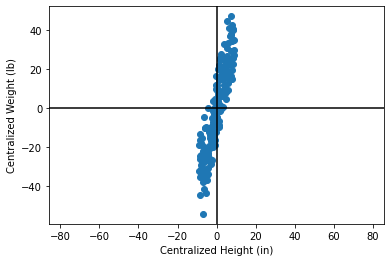

In [ ]:
# Centering the measurements at the origin
centered_data = np.array([heights - heights.mean(), weights - weights.mean()])

plt.scatter(centered_data[0], centered_data[1])
# Visualizes the x-axis and y-axis to mark the location of the origin
plt.axhline(0, c="black")
plt.axvline(0, c="black")
plt.xlabel("Centralized Height (in)")
plt.ylabel("Centralized Weight (lb)")
plt.axis("equal")
plt.show()